# The Infinite Spherical Well
#### Erik S. S&oslash;rensen, Physics & Astronomy, McMaster University,  November 9, 2019
Remember the infinite square well that you looked at in the first python notebook that we used. We later used almost the same method to look at the *finite* square well: we integrated up the center of the well and used the value of the wave-function there to determine if we had a solution or not. This method works both for the *finite* and *infinite* well. 

However, for the *infinite* well there is a simpler approach, since we know the wave-function (really $u(r)$) is zero at the right wall: integrate from the left wall all the way to the right wall and see if the wave-function is zero. This approach obviously yields **all** solutions and doesn't depend on symmetry. 

In fact, the shape of the potential does not need to be a constant between the two walls, a fact that we shall make use of to study the *infinite* spherical well.

## Question 1
Below is a slightly modified version of the python code we used to study the infinite square well. As mentioned above, we now integrate from the left wall to the right wall and check if the wave function is zero at the right wall. Modify this code so that you can study the infinite **spherical** well.  

You will need to be careful with how the effective potential behaves close to $r=0$. Instead of having it diverge as $r\to 0$ you could have it tend to a very large finite value. 

Adjust the code so that you can set $a=1$ and $l=10$. 

Submit all eigenvalues you find with $E<1000$.

C:\Users\kylem\PycharmProjects\QM Assignments\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


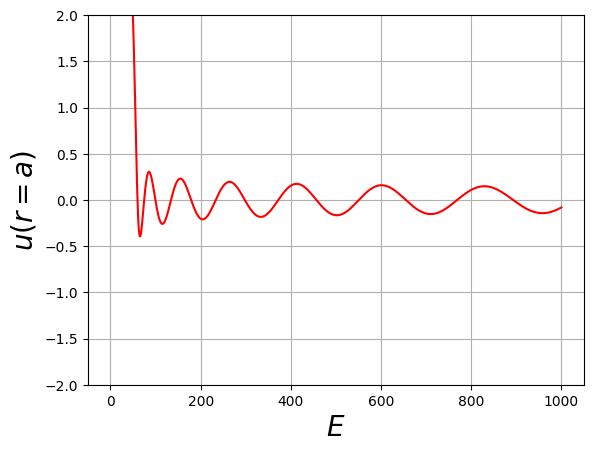

In [4]:
from pylab import *
from scipy.integrate import odeint
from scipy.optimize import brentq
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#matplotlib.use('nbagg')

def V(x):
    global a
    if x < abs(a):
        return 0
    else:
        return 1e10
    
def D1D2(psi, x):
    D1 = psi[1]

    if x > 0.01:
        D2 = psi[0] * ( 2 * (V(x) - E) + l*(l+1) ) - (2 * D1 / x)

    else:
        D2 = psi[0] * ( 2 * (V(x) - E) + l*(l+1) ) - (2 * D1 / 0.01)

    return array([D1, D2])

def Wave_function(energy):
    global psi,E
    E = energy                #We need this so as to pass it to D1D2
    psi = odeint(D1D2, psi0, x)
    psi = psi/sqrt(h*np.sum(np.square(psi[:,0])))
    return psi[-1,0]

N = 10000                   # number of discrete points on the x-axis
a = 1                       # Set the width of the well
l = 10                      # magnetic quantum number
psi = np.zeros([N,2])       # Wave function values and its derivative (psi and psi')
psi0 = array([0,1])         # Wave function initial states
x = linspace(0, a, N)      # the poinrts on the x-axis between left wall of the well and x=0
h=x[1]-x[0]
Emax = 1000.0 
Ebottom = 0.0                # let us only look for solutions between Ebottom =0 and Emax=100
en = linspace(Ebottom, Emax, 1000) # A number of discrete energies where we will calculate psi(x=0)
psi_b = []                  # vector of wave function at x = 0 for all of the energies in en
for e1 in en:
    psi_b.append(Wave_function(e1))     # Determine psi(x=0) for every e1 in en

plt.plot(en, psi_b, 'r-')
plt.xlabel(r'$E$',size=20)
plt.ylabel(r'$u(r=a)$',size=20)
plt.ylim(-2,2)
plt.grid(True)
plt.show()

In [5]:
def find_all_zeroes(x,y):
    all_zeroes = []
    s = sign(y)
    for i in range(len(y)-1):
        if s[i]+s[i+1] == 0:
            zero = brentq(Wave_function, x[i], x[i+1])
            all_zeroes.append(zero)
    return all_zeroes

E_zeroes = find_all_zeroes(en, psi_b)   # now find the precise energies where psi(x=a) = 0 
print( "Energies for the bound states are: ")
for E in E_zeroes:
        print( '%11.7f' % E)

Energies for the bound states are: 
 59.9584118
 74.8336183
 99.6255015
134.3344262
178.9593418
233.5003536
297.9567460
372.3289917
456.6148137
550.8181889
654.9340504
768.9614078
892.9053899


## Question 2
Finally, change your code (in the last box) to plot the 6th *excited* wave-function (i.e. the 7th wave-function if you count the ground-state) with $a=1$ and $l=10$. There is no need to plot the entire wave-function, just the radial part ($u(r)$) that the program is determining.

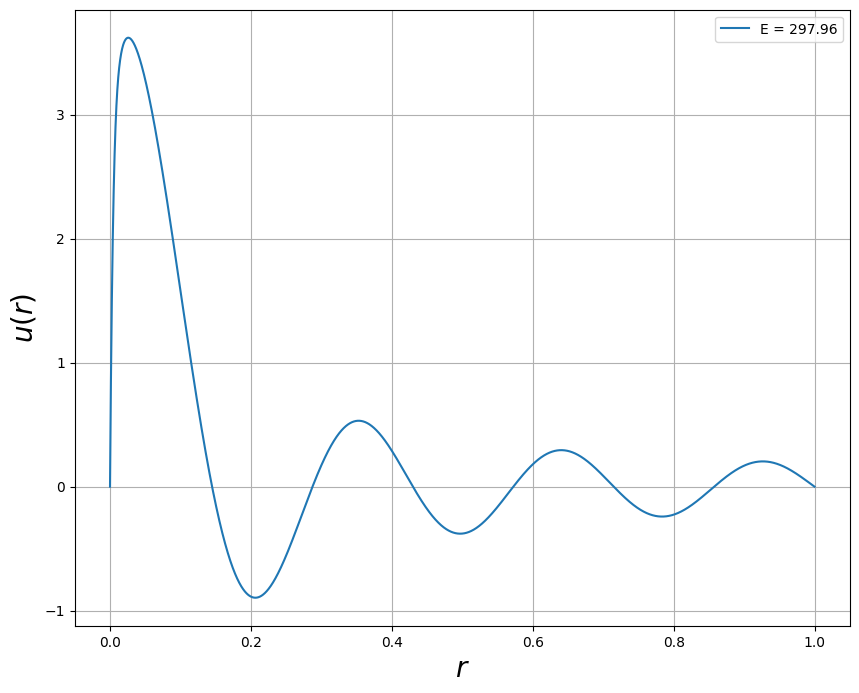

In [7]:
x = linspace(0, a, N)
h=x[1]-x[0]
plt.figure(figsize=(10,8))
for E in E_zeroes[6:7]:
        Wave_function(E)
        psi[:,0]=psi[:,0]/sqrt(np.sum(h*np.square(psi[:,0])))
        plt.plot(x, psi[:,0], label="E = %.2f"%E)
        
plt.xlabel(r'$r$',size=20)
plt.ylabel(r'$u(r)$',size=20)
plt.legend()
plt.grid(True)
plt.savefig('fig.pdf')
plt.show()